<a href="https://colab.research.google.com/github/james-lucius/qworld/blob/main/QB52_D06_Shors_Algorithm_In_More_Detail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://qworld.net" target="_blank" align="left"><img src="https://gitlab.com/qworld/qeducation/qbook101/raw/main/qworld/images/header.jpg" align="left"></a>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\Y}{ \mymatrix{rr}{0 & -i \\ i & 0} } $
$ \newcommand{\S}{ \mymatrix{rr}{1 & 0 \\ 0 & i} } $
$ \newcommand{\T}{ \mymatrix{rr}{1 & 0 \\ 0 & e^{i \frac{\pi}{4}}} } $
$ \newcommand{\Sdg}{ \mymatrix{rr}{1 & 0 \\ 0 & -i} } $
$ \newcommand{\Tdg}{ \mymatrix{rr}{1 & 0 \\ 0 & e^{-i \frac{\pi}{4}}} } $
$ \newcommand{\qgate}[1]{ \mathop{\textit{#1} } }$
$\newcommand{\Mod}[1]{\ (\mathrm{mod}\ #1)}$

_prepared by Özlem Salehi_

<font size="28px" style="font-size:28px;" align="left"><b> Shor's Algorithm in More Detail </b></font>
<br>
<br><br>

##### <font color="#08b806">Please execute the following cell, it is necessary to distinguish between your local environment and Google Colab's

In [1]:
import IPython

def in_colab():
    try:
        import google.colab
        return True
    except:
        return False

SolutionToTask1 = lambda: IPython.display.display(IPython.display.Javascript('window.open("{url}");'.format(url='https://colab.research.google.com/drive/1wBpzuoA4TuWD4br5sDkC1wDspBMRoon7?usp=sharing#scrollTo=mPyxM1tqn5fQ' if in_colab() else 'QB52_D06_Shors_Algorithm_In_More_Detail_Solutions.ipynb#task1')))

##### In this notebook we will analyze Shor's algorithm step by step to gain more intuition. Let's start by examining the phase estimation and order finding stages in more detail, in the context of factoring problem.

<h2>More about phase estimation circuit</h2>

Recall the controlled operations in the phase estimation circuit. We will examine the effect of applying a series of controlled $ U $ operators. Let $ U $ be an operator with eigenvector $ \ket{\psi} $ and the corresponding eigenvalue $ e^{2\pi i \phi } $.

 <img src="https://gitlab.com/qworld/qeducation/qbook101/raw/main/qbook101/images/ch5/phase.png" width="50%" align="center">
         

We start with the initial state $ \ket{0}^{\otimes t}\ket{\psi}$.

After applying Hadamard to first register we get $ \displaystyle \frac{1}{2^{t/2}} \sum_{k=0}^{2^t-1} \ket{k}\ket{\psi}  $.

Let $ k=k_1 \cdots k_t $ be the state of the first register. Let's apply the first controlled gate, $ CU^{2^0} $ where qubit $t$ is the control.

If $ k_t=0 $, new state is  $\ket{k} \ket{\psi} $. If $ k_t=1 $, new state is $ e^{2\pi i \phi 2^0} \ket{k} \ket{\psi} $.

Hence, we can write it as, $\ket{k} U^{k_t 2 ^0} \ket{\psi}.$


<h3>Task 1 (on paper)</h3>

Show that after applying the controlled $U^{2^j}$ gates for $j=0,\dots,t-1$, the state obtained can be expressed as $\displaystyle \frac{1}{2^{t/2}} \sum_{k=0}^{2^t-1} \ket{k}U^k\ket{\psi}$.

To check out our solution, run the next cell:

In [2]:
SolutionToTask1()  # show solution for task 1

<IPython.core.display.Javascript object>

As you can see, we have transformed the quantum state $\displaystyle \frac{1}{2^{t/2}} \sum_{k=0}^{2^t-1} \ket{k}\ket{\psi}$ into the state $\displaystyle \frac{1}{2^{t/2}} \sum_{k=0}^{2^t-1} \ket{k}U^k\ket{\psi}$ after applying the controlled $U$ gates.

<h2>Order finding revisited</h2>

Now let's see what happens in the case of order finding algorithm. Recall the definition of $ U $.

$
U \ket{y} \rightarrow \ket{xy \Mod{N}}
$

Combining with what we have deduced above, in Shor's algorithm after the controlled operations our quantum states look like

$ \displaystyle
\frac{1}{{2^{t/2}}}\sum_{k=0}^{{2^t}-1}\ket{k}\ket{1} \rightarrow 	 \frac{1}{2^{t/2}} \sum_{k=0}^{2^t-1} \ket{k}\ket{x^k \Mod{N}}.
$

Note that since $x^r \Mod{N}=1$, the second register will be in a superposition of integers which are periodic. In the rest of the discussion, we will omit the multiplers.

$\ket{x^0 \Mod{N}}+\ket{x^1 \Mod{N}}+ \ket{x^2 \Mod{N}}+\cdots +\ket{x^r \Mod{N}}+\ket{x^{r+1} \Mod{N}}+\ket{x^{r+2} \Mod{N}}+ \cdots+ \ket{x^{2^t -1} \Mod{N}}$

$$=\ket{1}+\ket{x}+\ket{x^2 \Mod{N}}+\cdots +\ket{1}+\ket{x}+\ket{x^2 \Mod{N}} + \cdots$$

Let's express the state of both registers.

$$\ket{0}\ket{1}+\ket{1}\ket{x}+\ket{2}\ket{x^2 \Mod{N}}+\cdots +\ket{r}\ket{1}+\ket{r+1}\ket{x}+\ket{r+2}\ket{x^2 \Mod{N}} + \cdots$$

At this stage let's measure the second register and say that $\ket{j}$ is observed. Then the first register will be holding integers $\ket{k}$ such that $x^k \Mod{N} = j$. Hence, the first register will be in the following superposition:

$$\ket{x_0}+ \ket{x_0+r}+ \ket{x_0+2r}+ \ket{x_0+3r} + \cdots  $$

Recall that in the Discrete Fourier Transform notebook, we had observed that when $DFT$ was applied on a periodic list of size $N$ with period $r$, then the transformed list had peaks around integer multiples of $N/r$.

The same happens here. We apply inverse $QFT$ to the first register and end up with states of the following form in the first register.

$$
\ket{0} + \ket{2^t/r} + \ket{2 \cdot 2^t/r} + \ket{3 \cdot 2^t/r} + \cdots
$$

When we measure the first register, we observe $s\cdot 2^t /r$ for some $s$. Hence by dividing with $2^t$, we obtain an estimate for $\frac{s}{r}$, from which we extract $r$ by continued fractions algorithm.

<h2>Summary</h2>

- Start with the state
$ \ket{0}\ket{1} .$

- Apply Hadamard to first register.

$\displaystyle \frac{1}{\sqrt{2^t}} \sum_{k=0}^{2^t-1} \ket{k}\ket{1}$

- Apply controlled operations.

$
  \displaystyle \frac{1}{\sqrt{2^t}} \sum_{k=0}^{2^t-1} \ket{k}\ket{x^k \Mod{N}}
$

- Measure the second register and continue with the first register.

$
\displaystyle \sqrt{\frac{r}{2^t}} \sum_{x=0}^{2^t/r -1} \ket{x_0+xr}
$

- Apply inverse $QFT$ to the first register.

$
\displaystyle \sqrt{\frac{r}{2^t}} \sum_{k=0}^{2^t-1} \frac{1}{\sqrt{2^{t} } }
\sum_{x=0}^{2^t/r-1}  e^{-\frac{2\pi i(rx+x_0)k}{2^t}} \ket{k}
$

- Measure the first register. Divide the state you observe by $2^t$ and apply continued fractions algorithm.

Let's analyze the last step in more detail. Probability of observing a particular state $ \ket{k} $ is given by $
\displaystyle  \frac{1}{r} \left | \frac{r}{2^t}  \sum_{x=0}^{2^t/r-1}   e^{-\frac{2\pi irxk}{ {2^t}}  }  \right |^2.
$


Let's run a python code to plot these probabilities in particular case of $r=6$ and $t=11$.

In [3]:
import math
from math import pi
from cmath import exp

r=6
t=11
probabilities=[]
s=0
for k in range(2**t):
    for x in range(math.ceil((2**t)/r)):
        s+=exp(-(2*pi*1j*r*x*k)/(2**t))
    s*=r/(2**t)
    s=((abs(s))**2)/r
    probabilities.append(s)

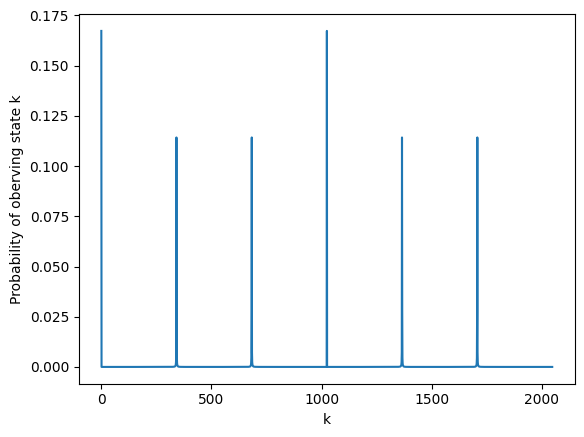

In [4]:
import matplotlib.pyplot as plt
plt.plot(probabilities)
plt.ylabel('Probability of oberving state k')
plt.xlabel('k')
plt.show()


Probability peaks around the integer multiples of $2^t/r $ so that with probability (approximately) $ \frac{1}{r} $, one of the states $ \ket{s \cdot  2^t/r} $ is observed for $ s=0,\dots,r-1 $.

In [5]:
print("Observed states:")
for s in range (6):
    print(round(s*2**t/r))

Observed states:
0
341
683
1024
1365
1707


$ \dfrac{s \cdot 2^t/r}{2^t} $ is an estimate for $ \dfrac{s}{r} $ and we apply continued fractions algorithm to extract $ r $.



# Shor's Algorithm Revisited

Now combining what we have seen so far, we will go over Shor's Algorithm step by step to understand what is happening behind. Let's recall the algorithm.

<h2>Algorithm</h2>

- Pick $x$ randomly in the range $1$ to $N-1$, such that $gcd(x,N)=1$.
- Use order finding algorithm to find order of $x\Mod{N}$, which will be denoted by $r$.
- If $r$ is even, and $x^{r/2} \neq -1 \Mod{N}$, then compute $gcd(x^{r/2} -1, N)$ and  $gcd(x^{r/2}+1, N)$.
- Test to see if one of these is a non-trivial factor. If so return, otherwise the algorithm fails. If that is the case, repeat.

As we have discussed previously, Shor's algorithm uses order finding algorithm which is a special case of quantum phase estimation where the operator whose phase is estimated is $ U_x \ket{y} \rightarrow \ket{xy {\Mod{N}}}$.

<h3>Factoring 15</h3>

- We choose a random $x<N$ which is co-prime with $15$. For this example, let us pick $x=7$. However it is important to mention that it can be the case that this randomly chosen $x$ may not work. For the ease of demonstration we have chosen a value which will work.

- We will compute the order of $7 \Mod{15}$, using the order finding algorithm. $ L=4 $, $\varepsilon = 0.1$ and $t=2L+1+\left \lceil \log \left (2 + \frac{1}{2\varepsilon} \right) \right \rceil =12$.

- Let's begin with $\ket{0} \ket{1}$. Instead of binary representation of the states, we will use integer representations.  Applying Hadamard to first register we get:

\begin{align*}
\frac{1}{\sqrt{2^{12}}} \sum_{k=0}^{2^{12}-1} \ket{k}\ket{1} =\frac{1}{\sqrt{2^{12}}} \bigl (\ket{0} \ket{1}+\ket{1}\ket{1}+\ket{2}\ket{1}+\cdots+\ket{2^{12}-1} \ket{1} \bigr )
\end{align*}

- Noting that $y$ is equal to $1$, after applying the controlled operations we get:

\begin{align*}
&\frac{1}{\sqrt{2^{12}}} \sum_{k=0}^{2^{12}-1} \ket{k}\ket{x^k \Mod{N}}\\
=&\frac{1}{\sqrt{2^{12}}}\bigl (\ket{0}\ket{1}+\ket{1}\ket{7}+\ket{2}\ket{4}+\ket{3}\ket{13}+\ket{4}\ket{1}+\ket{5}\ket{7}+\ket{6}\ket{4}+\cdots+\ket{2^{12}-1}\ket{\cdots} \bigr )
\end{align*}

At this stage we should apply $QFT^{\dagger}$ to the first register and measure it. After this procedure, second register will be in one of the states  $\ket{1},\ket{7},\ket{4},\ket{13}$.

To be able to analyze the effect of $QFT^{\dagger}$ better, let's measure the second register before applying $QFT^{\dagger}$ to the first register. Let's suppose that the second register is in state $\ket{4}$ after the measurement.

The first register looks like the following:

\begin{align}
\sqrt{\frac{4}{2^{12}}}\bigl(\ket{2}+\ket{6}+\ket{10}+\ket{14}+\cdots + \ket{4094}\bigr).
\end{align}

Note that in our case, $ r $ is a power of 2 and we have exactly $\frac{2^{12}}{2^2}  $ states in the above sum. We can also express the above state as follows. This is also the quantum state to which $QFT^{\dagger}$ is applied.

$$
\frac{1}{\sqrt{2^{10}}} \sum_{x=0}^{2^{10}-1} \ket{4x +2}
$$



Now let's try to understand the effects of ${QFT}^{\dagger}$ on the first register. But first let's remember the definition.

$$
{QFT}^{\dagger} \ket{j} = \frac{1}{\sqrt{2^t}} \sum_{k=0}^{2^{t}-1} e^{-\frac{2\pi ijk}{2^t}} \ket{k}\\
$$


After applying ${QFT}^{\dagger}$, amplitude of a specific state $ \ket{k} $ will be the summation of the amplitudes obtained after applying $\displaystyle {QFT}^{\dagger}$ to each state in the superposition $\frac{1}{\sqrt{2^{10}}} \sum_{x=0}^{2^{10}-1} \ket{4x +2}$. For instance, let's apply ${QFT}^{\dagger}$ to $ \ket{2} $.

\begin{align*}
{QFT}^{\dagger} \ket{2} = &\ket{0} + e^{-\frac{2\pi i\cdot2}{4096}} \ket{1} +e^{-\frac{2\pi i\cdot2\cdot2}{4096}} \ket{2} + \cdots+ e^{-\frac{2\pi i\cdot2\cdot1024}{4096}} \ket{1024}+\\
&\cdots +e^{-\frac{2\pi i\cdot2\cdot2048}{4096}} \ket{2048}+\cdots +e^{-\frac{2\pi i\cdot2\cdot3072}{4096}} \ket{3072}+ \cdots +e^{-\frac{2\pi i\cdot2\cdot4095}{4096}} \ket{4095}
\end{align*}


Note that for states $ \ket{0} $, $ \ket{1024} $, $ \ket{2048} $ and $ \ket{3072} $, the coefficients are equal to 1.

Similarly, we apply $QFT^{\dagger}$ to states $\ket{6}$, $ \ket{10} $, $ \dots $, $ \ket{4094} $. Overall, the state obtained after applying $QFT^{\dagger}$ can be expressed as

$$
\frac{1}{\sqrt{2^{10}}} \sum_{x=0}^{2^{10}-1} \frac{1}{\sqrt{2^{12} } } \sum_{k=0}^{2^{12}-1}  e^{-\frac{2\pi i(4x+2)k}{4096} } \ket{k}.
$$

The probability of observing state $ \ket{k} $ is given by

$$
\left | \frac{1}{\sqrt{2^{10}\cdot2^{12} } } \sum_{x=0}^{2^{10}-1}  e^{-\frac{2\pi i(4x+2)k}{4096} }   \right |^2.
$$

We can drop the coefficient $ e^{\frac{2\pi i(2k)}{4096} }  $ as it is constant for all $ k $ and after getting absolute value and getting squared it is equal to 1. Now let's rewrite the state.

$$
\frac{1}{4} \left | \frac{1}{2^{10}} \sum_{x=0}^{2^{10}-1}  e^{-\frac{2\pi i(4xk)}{4096} }  \right |^2
$$

Note that when $ 4k $ is a multiple of $ 4096 $, then the coefficients are equal to 1 for all $ 2^{10} $ values of $ x $. Therefore, for each $ k=0,1024,2048  $ and $ 3072 $,  the probability of observing state $ \ket{k} $ is equal to $ \frac{1}{4} $. Note that in this example $ r $ is a power of $ 2 $ and the probabilities peak exactly around the multiples of $ \frac{2^t}{r} $.

To sum up, after applying $QFT^{\dagger}$ we measure the states $\ket{0},\ket{1024},\ket{2048},\ket{3072}$ each with probability $\frac{1}{4}$.

At this stage, we should run the continued fractions algorithm to find out $r$ and compute $gcd(x^{r/2} -1, N)$ and $gcd(x^{r/2}+1, N)$ to find out the factors of 15.